In [1]:
import pandas as pd

# Loading the training dataset
train_data_path = "D:/Documents/ALEX/ML/datos_sinteticos_train.xlsx"
train_df = pd.read_excel(train_data_path)

# Displaying the first few rows of the training dataset
print(train_df.head())


             USD_AMT         DIA_SEMANA    AVG_AMT_MENSUAL    SUM_AMT_MENSUAL  \
0    373029355989948  14180598909378500  12182067163551700   4293119148333790   
1  15142718022703700  12257203190093600  29848883811127700   8103989630704640   
2    566748454297091  15600075459841500   2920671237194820  11122148550964900   
3   6160770139323450  23205819437136200  22004509444932600    359761815718512   
4  31227647254610300  14923365183214900  11294168063628200   4149614955657350   

   AVG_TRAN_MENSUAL  CANT_TRAN_MENSUAL MOMENTO_DIA     MIN_XDIA_MONTO  \
0  4766174911347420   4082268065532630         DIA   2417752890262020   
1  4068061182597870  38355823758564496         DIA   7826812953204510   
2   707267663602448  31940763778231000         DIA  15947045675665500   
3   350800649722378   4553845328737170         DIA   2321983102946280   
4  1532732841562410   5928883523961000         DIA   1299371647333190   

      MAX_XDIA_MONTO  CANT_BEFORE_WEEK  ...           CANT_5_M  \
0   3318

The complete Python code for FRAUD DETECTION project, covering data loading, preprocessing, model selection, training, evaluation, and recommendations based on the results. 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy import sparse


# Defining the column names
columns = [
    'USD_AMT', 'DIA_SEMANA', 'AVG_AMT_MENSUAL', 'SUM_AMT_MENSUAL', 'AVG_TRAN_MENSUAL',
    'CANT_TRAN_MENSUAL', 'MOMENTO_DIA', 'MIN_XDIA_MONTO', 'MAX_XDIA_MONTO', 'CANT_BEFORE_WEEK',
    'MONTO_BEFORE_WEEK', 'CANT_24_H', 'CANT_5_M', 'CANT_10_M', 'CANT_20_M', 'CANT_30_M',
    'CANT_1_HR', 'FRAUDE_DEFTV', 'MERCHANT_CATEGORY_XCD', 'MERCHANT_COUNTRY_XCD',
    'MERCHANT_NAME', 'TRANSACTION_DTTM'
]

# Renaming the columns in the dataframe
train_df.columns = columns

# Separating features and target variable
X = train_df.drop(columns=['FRAUDE_DEFTV'])
y = train_df['FRAUDE_DEFTV']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting categorical variables to sparse matrices
X_train_encoded = sparse.hstack([
    sparse.csr_matrix(X_train.drop(columns=['MOMENTO_DIA', 'MERCHANT_CATEGORY_XCD', 'MERCHANT_COUNTRY_XCD', 'MERCHANT_NAME', 'TRANSACTION_DTTM']).astype(float)),
    sparse.csr_matrix(pd.get_dummies(X_train[['MOMENTO_DIA', 'MERCHANT_CATEGORY_XCD', 'MERCHANT_COUNTRY_XCD']], sparse=True))
])

X_val_encoded = sparse.hstack([
    sparse.csr_matrix(X_val.drop(columns=['MOMENTO_DIA', 'MERCHANT_CATEGORY_XCD', 'MERCHANT_COUNTRY_XCD', 'MERCHANT_NAME', 'TRANSACTION_DTTM']).astype(float)),
    sparse.csr_matrix(pd.get_dummies(X_val[['MOMENTO_DIA', 'MERCHANT_CATEGORY_XCD', 'MERCHANT_COUNTRY_XCD']], sparse=True))
])

# Initializing and training a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Making predictions on the validation set
y_pred = rf_classifier.predict(X_val_encoded)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.9874639588817852
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23631
           1       0.00      0.00      0.00       300

    accuracy                           0.99     23931
   macro avg       0.49      0.50      0.50     23931
weighted avg       0.98      0.99      0.98     23931



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
#Getting the column names
column_names = train_df.columns.tolist()

# Printing out the column names
print("Column Names:")
for col in column_names:
    print(col)

Column Names:
USD_AMT
DIA_SEMANA
AVG_AMT_MENSUAL
SUM_AMT_MENSUAL
AVG_TRAN_MENSUAL
CANT_TRAN_MENSUAL
MOMENTO_DIA
MIN_XDIA_MONTO
MAX_XDIA_MONTO
CANT_BEFORE_WEEK
MONTO_BEFORE_WEEK
CANT_24_H
CANT_5_M
CANT_10_M
CANT_20_M
CANT_30_M
CANT_1_HR
FRAUDE_DEFTV
MERCHANT_CATEGORY_XCD
MERCHANT_COUNTRY_XCD
MERCHANT_NAME
TRANSACTION_DTTM


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
train_df = pd.read_excel('D:/Documents/ALEX/ML/datos_sinteticos_train.xlsx')

# Defining the column names
columns = [
    'USD_AMT', 'DIA_SEMANA', 'AVG_AMT_MENSUAL', 'SUM_AMT_MENSUAL', 'AVG_TRAN_MENSUAL',
    'CANT_TRAN_MENSUAL', 'MOMENTO_DIA', 'MIN_XDIA_MONTO', 'MAX_XDIA_MONTO', 'CANT_BEFORE_WEEK',
    'MONTO_BEFORE_WEEK', 'CANT_24_H', 'CANT_5_M', 'CANT_10_M', 'CANT_20_M', 'CANT_30_M',
    'CANT_1_HR', 'FRAUDE_DEFTV', 'MERCHANT_CATEGORY_XCD', 'MERCHANT_COUNTRY_XCD',
    'MERCHANT_NAME', 'TRANSACTION_DTTM'
]

# Renaming the columns in the dataframe
train_df.columns = columns


In [7]:
train_df.columns = columns
train_df.columns

Index(['USD_AMT', 'DIA_SEMANA', 'AVG_AMT_MENSUAL', 'SUM_AMT_MENSUAL',
       'AVG_TRAN_MENSUAL', 'CANT_TRAN_MENSUAL', 'MOMENTO_DIA',
       'MIN_XDIA_MONTO', 'MAX_XDIA_MONTO', 'CANT_BEFORE_WEEK',
       'MONTO_BEFORE_WEEK', 'CANT_24_H', 'CANT_5_M', 'CANT_10_M', 'CANT_20_M',
       'CANT_30_M', 'CANT_1_HR', 'FRAUDE_DEFTV', 'MERCHANT_CATEGORY_XCD',
       'MERCHANT_COUNTRY_XCD', 'MERCHANT_NAME', 'TRANSACTION_DTTM'],
      dtype='object')

In [3]:
# Displaying the first few rows of the dataframe
print(train_df.head())

             USD_AMT         DIA_SEMANA    AVG_AMT_MENSUAL    SUM_AMT_MENSUAL  \
0    373029355989948  14180598909378500  12182067163551700   4293119148333790   
1  15142718022703700  12257203190093600  29848883811127700   8103989630704640   
2    566748454297091  15600075459841500   2920671237194820  11122148550964900   
3   6160770139323450  23205819437136200  22004509444932600    359761815718512   
4  31227647254610300  14923365183214900  11294168063628200   4149614955657350   

   AVG_TRAN_MENSUAL  CANT_TRAN_MENSUAL MOMENTO_DIA     MIN_XDIA_MONTO  \
0  4766174911347420   4082268065532630         DIA   2417752890262020   
1  4068061182597870  38355823758564496         DIA   7826812953204510   
2   707267663602448  31940763778231000         DIA  15947045675665500   
3   350800649722378   4553845328737170         DIA   2321983102946280   
4  1532732841562410   5928883523961000         DIA   1299371647333190   

      MAX_XDIA_MONTO  CANT_BEFORE_WEEK  ...           CANT_5_M  \
0   3318

In [4]:
# Displaying summary statistics
print(train_df.describe())

            USD_AMT    DIA_SEMANA  AVG_AMT_MENSUAL  SUM_AMT_MENSUAL  \
count  1.196530e+05  1.196530e+05     1.196530e+05     1.196530e+05   
mean   1.277015e+16  1.235231e+16     1.264092e+16     1.295513e+16   
std    1.327152e+16  6.685504e+15     1.313276e+16     1.381322e+16   
min    1.124123e+11  1.038211e+12     2.051170e+11     3.501651e+09   
25%    4.141708e+15  1.018083e+16     4.126550e+15     4.275722e+15   
50%    7.258569e+15  1.451800e+16     7.204284e+15     7.943124e+15   
75%    1.788098e+16  1.714757e+16     1.763579e+16     1.553814e+16   
max    8.189497e+16  2.999222e+16     8.191457e+16     8.185665e+16   

       AVG_TRAN_MENSUAL  CANT_TRAN_MENSUAL  MIN_XDIA_MONTO  MAX_XDIA_MONTO  \
count      1.196530e+05       1.196530e+05    1.196530e+05    1.196530e+05   
mean       1.386116e+16       1.314913e+16    1.272423e+16    1.269108e+16   
std        1.426560e+16       1.317703e+16    1.323898e+16    1.320860e+16   
min        4.521343e+10       5.944319e+10    7.

In [5]:
# Displaying information about the dataframe
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119653 entries, 0 to 119652
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   USD_AMT                119653 non-null  int64 
 1   DIA_SEMANA             119653 non-null  int64 
 2   AVG_AMT_MENSUAL        119653 non-null  int64 
 3   SUM_AMT_MENSUAL        119653 non-null  int64 
 4   AVG_TRAN_MENSUAL       119653 non-null  int64 
 5   CANT_TRAN_MENSUAL      119653 non-null  int64 
 6   MOMENTO_DIA            119360 non-null  object
 7   MIN_XDIA_MONTO         119653 non-null  int64 
 8   MAX_XDIA_MONTO         119653 non-null  int64 
 9   CANT_BEFORE_WEEK       119653 non-null  int64 
 10  MONTO_BEFORE_WEEK      119653 non-null  int64 
 11  CANT_24_H              119653 non-null  int64 
 12  CANT_5_M               119653 non-null  int64 
 13  CANT_10_M              119653 non-null  int64 
 14  CANT_20_M              119653 non-null  int64 
 15  

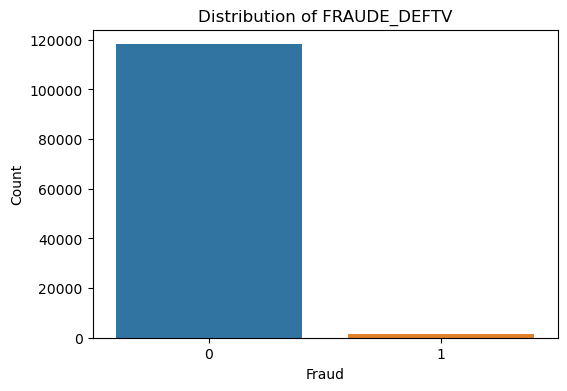

In [6]:
# Plotting the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='FRAUDE_DEFTV', data=train_df)
plt.title('Distribution of FRAUDE_DEFTV')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

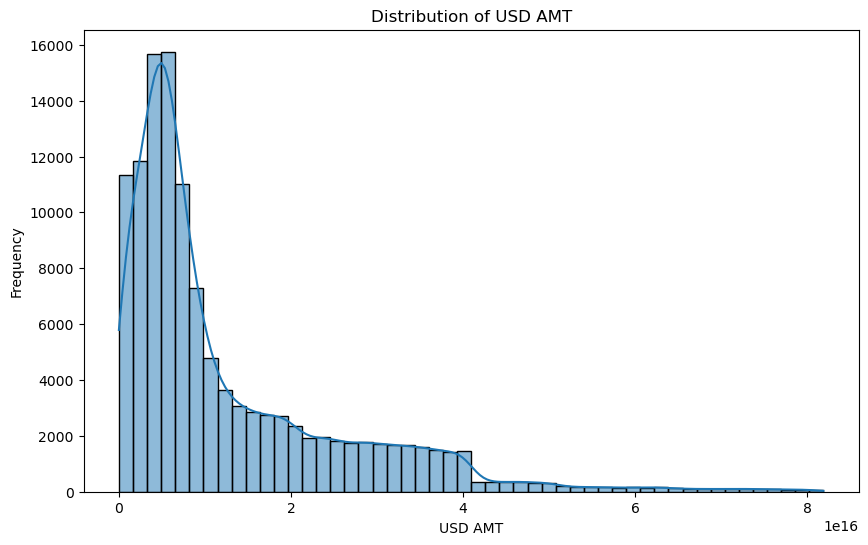

In [13]:
# Plotting the distribution of USD_AMT
plt.figure(figsize=(10, 6))
sns.histplot(train_df['USD_AMT'], bins=50, kde=True)
plt.title('Distribution of USD AMT')
plt.xlabel('USD AMT')
plt.ylabel('Frequency')
plt.show()

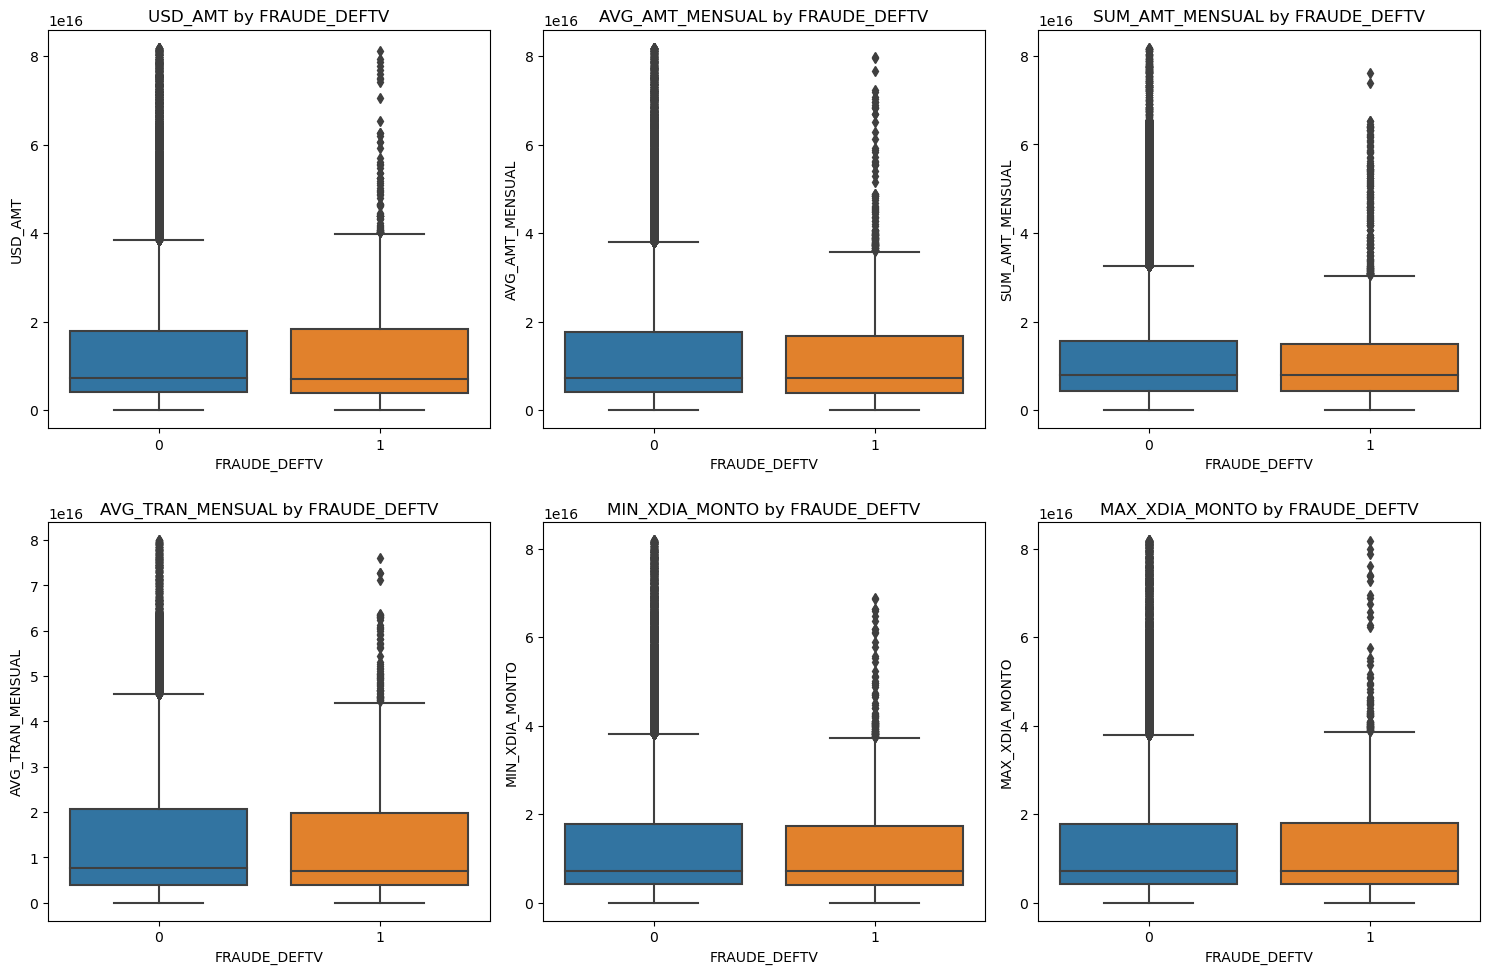

In [10]:
# Plotting boxplots for numerical features
numerical_features = ['USD_AMT', 'AVG_AMT_MENSUAL', 'SUM_AMT_MENSUAL', 'AVG_TRAN_MENSUAL', 'MIN_XDIA_MONTO', 'MAX_XDIA_MONTO']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='FRAUDE_DEFTV', y=feature, data=train_df)
    plt.title(f'{feature} by FRAUDE_DEFTV')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11332\2689644433.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


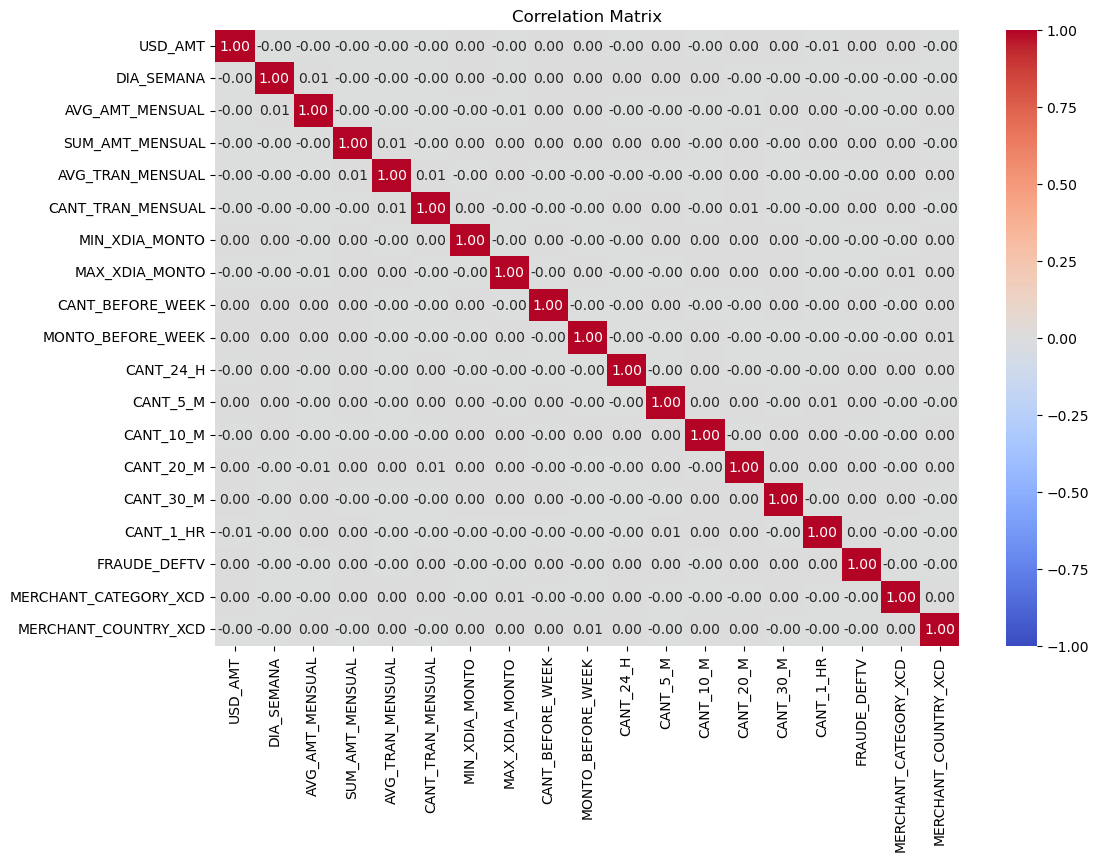

In [11]:
# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

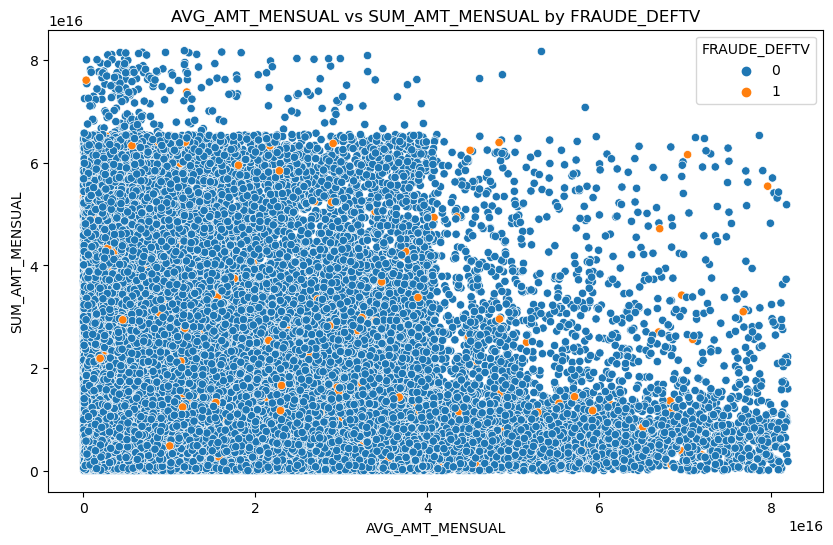

In [12]:
# Scatter plot of AVG_AMT_MENSUAL vs SUM_AMT_MENSUAL colored by FRAUDE_DEFTV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVG_AMT_MENSUAL', y='SUM_AMT_MENSUAL', hue='FRAUDE_DEFTV', data=train_df)
plt.title('AVG_AMT_MENSUAL vs SUM_AMT_MENSUAL by FRAUDE_DEFTV')
plt.xlabel('AVG_AMT_MENSUAL')
plt.ylabel('SUM_AMT_MENSUAL')
plt.show()

In [ ]:
# Pair plot for numerical features
sns.pairplot(train_df, hue='FRAUDE_DEFTV', vars=numerical_features)
plt.title('Pair Plot of Numerical Features')
plt.show()

In [ ]:
# Distribution of categorical features
categorical_features = ['DIA_SEMANA', 'MOMENTO_DIA', 'MERCHANT_CATEGORY_XCD', 'MERCHANT_COUNTRY_XCD']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=train_df, hue='FRAUDE_DEFTV')
    plt.title(f'Distribution of {feature} by FRAUDE_DEFTV')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Violin plot for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='FRAUDE_DEFTV', y=feature, data=train_df)
    plt.title(f'{feature} by FRAUDE_DEFTV')
plt.tight_layout()
plt.show()

In [ ]:
# Feature importance from the Random Forest classifier
importances = rf_classifier.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
# Converting TRANSACTION_DTTM to datetime
train_df['TRANSACTION_DTTM'] = pd.to_datetime(train_df['TRANSACTION_DTTM'])

# Plotting number of transactions over time
plt.figure(figsize=(12, 6))
train_df.set_index('TRANSACTION_DTTM')['FRAUDE_DEFTV'].resample('D').count().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
# Plotting fraud transactions over time
plt.figure(figsize=(12, 6))
train_df[train_df['FRAUDE_DEFTV'] == 1].set_index('TRANSACTION_DTTM')['FRAUDE_DEFTV'].resample('D').count().plot()
plt.title('Number of Fraud Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraud Transactions')
plt.show()